Here we are going to preform Handwritten Character Recognition on Devanagari Image Dataset using Naive Bayes Classifier from Scratch.

The Dataset is consists of two folder one is Train and the other is Test. Both Train and Test folders consists of 46 folders of  Devanagari Characters and Digits. The folders in Train folder consists of 1700 images of each Character and Digit whereas in Test folder, each character and Digit folder consists of 300 images.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as s
import os
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [2]:
base_path = "./DevanagariHandwrittenCharacterDataset/Train"

In [3]:
# All the folders present in the base path(Dataset).
list_of_folders = os.listdir(base_path)

In [4]:
list_of_folders

['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [5]:
# Base Path to get all the images.
base_path_for_one_image = os.path.join(base_path,list_of_folders[0])

In [6]:
# Taking names of all the images into the list.
list_of_all_images = os.listdir(base_path_for_one_image)

In [7]:
# Path for One Image
one_image_path = os.path.join(base_path_for_one_image,list_of_all_images[0])

In [8]:
# Reading the Image.
one_image = plt.imread(one_image_path)

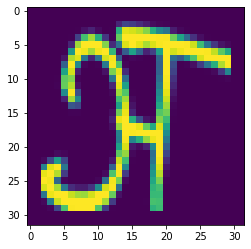

In [9]:
# This is how one image in our dataset looks like.
plt.imshow(one_image)

In [10]:
# This function will convert the image of 32X32 into (1,1024) matrix.

def image_stretching(one_image_path):
    
    image_matrix = plt.imread(one_image_path) # reading the images as pixel values.

    image_matrix = image_matrix.reshape(1,1024)
    
    return image_matrix

In [11]:
stacked_up_images = []

for one_folder in list_of_folders:
    
    one_folder_path = os.path.join(base path,one_folder) # Joining the base path every folder present in it one by one.
    
    list_of_images_one_folder = os.listdir(one_folder_path) # All Image in one folder.

    # Extending all images of one folder to the list "stacked_up_images". Now this likst will contain all the 78200 images
    # with pixcel value as 1024 features. As we are passing every image to "image_stretching" function.
    stacked_up_images.extend(map(lambda x: image_stretching(os.path.join(one_folder_path,x)),list_of_images_one_folder))

In [12]:
len(stacked_up_images)

78200

In [13]:
stacked_up_images = np.array(stacked_up_images)

In [14]:
stacked_up_images = stacked_up_images.reshape(78200,1024)

In [15]:
# Creating the array into DataFrame.
training_data = pd.DataFrame(stacked_up_images)

In [16]:
training_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Getting labels as numbers ranging from 0 to 45, equal to the number of classes(46) present in data.
labels = []

labels.extend(map(lambda x: x*np.ones((1700,1)),np.arange(0,46)))

In [18]:
labels = np.concatenate(labels)

In [19]:
labels.shape

(78200, 1)

In [20]:
# Adding labels column to training_data
training_data['labels'] = labels

In [21]:
training_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#calculate mean for every feature
mean_vector_list = []
for i in range(1024):
    mean_vector_list.append(training_data.iloc[:,i].mean())
mean_vector_list = np.array(mean_vector_list)
mean_vector_list = mean_vector_list.reshape(1024,1)

In [23]:
#calculate standard deviation for every feature
std_vector_list = []
for i in range(1024):
    std_vector_list.append(training_data.iloc[:,i].std())
std_vector_list = np.array(std_vector_list)
std_vector_list = std_vector_list.reshape(1024,1)

In [24]:
# Creating data of Zero Mean and One Standard Deviation by substracting mean and dividing standard deviation from each value. 
for i in range(1024):
    training_data.iloc[:,i] = training_data.iloc[:,i]-mean_vector_list[i]
    if std_vector_list[i]!=0:
        training_data.iloc[:,i] = training_data.iloc[:,i]/std_vector_list[i]

In [25]:
# Applying Regularized Discriminant Analysis.
def regularized_matrices(cov_mats,pooled_cov):
    
    alpha = np.random.uniform(0,1) # randomly choosing value of alpha between 0 to 1.
    gamma = np.random.uniform(0,1) # randomly choosing value of gamma between 0 to 1.
    
    # Applying RDA
    stage1_covs = []
    stage1_covs.extend(map(lambda x: (alpha*x)+((1-alpha)*pooled_cov),cov_mats))
    
    final_regularized_matrices = []
    final_regularized_matrices.extend(map(lambda x: (gamma*x)+((1-gamma)*(np.mean(np.diag(x)))*np.eye(pooled_cov.shape[0],pooled_cov.shape[0])),stage1_covs))
    
    return alpha,gamma,final_regularized_matrices

In [26]:
# Applying PCA to the data.

def pca_reduced_data(whole_data_single_cov_mat,preserved_variance):
    
    # Performing Singular Value Decomposition of Covariance matrix.
    svd_factorized_matrix = np.linalg.svd(whole_data_single_cov_mat)
    
    eigen_values_total = np.sum(svd_factorized_matrix[1]) # Taking Total sum of Eigen values.
    
    eigen_values_sum = 0
    
    i = 0
    
    # The amount of features we want to take as "preserved_variance" to get the most valuable information of the complete data.
    for lmbda in svd_factorized_matrix[1]:
        
        # We will start taking sum of eigen values and if the "taken sum/total eigen sum > preversed_variance it'll break.
        # i.e. we have got the features that has most of the information(97% or 99% depending on preserved_variance)
        # of the complete data
        if eigen_values_sum/eigen_values_total > preserved_variance:
            
            break
        
        i += 1 # the number of times we are increasing the sum.
        
        eigen_values_sum += lmbda
        
    eigen_vectors = svd_factorized_matrix[0][:,0:i] # We'll take i number of eigen vectors
    
    training_examples = np.array(training_data.iloc[:,0:1024])
    
    reduced_training_examples = np.matmul(training_examples,eigen_vectors) # Projecting the data into new vector space.
    
    return reduced_training_examples,eigen_vectors

In [27]:
# Taking Covariance of the all the images in one folder of all the folders.
def class_cov_mats(data):
    
    cov_mats = []
    
    cov_mats.extend(map(lambda x: np.cov(data[(1700*x):(1700*(x+1))],rowvar=0),np.arange(0,46)))
    
    return cov_mats

In [28]:
# Calculating the Posterior Prbability of every example belonging to its respective class. 
# We'll get a list of 46 Probabilties for one example.
def posterior_probabilities(data,class_mean_vecs,class_covs):
    
    class_conditional_probabilities = []
    
    class_conditional_probabilities.extend(map(lambda x: s.multivariate_normal.pdf(data,class_mean_vecs[x],class_covs[x]).reshape(data.shape[0],1),np.arange(0,46)))
    
    return class_conditional_probabilities

In [29]:
single_whole_data_cov_mat = training_data.iloc[:,0:1024].cov() # Covariance Matrix of Complete data.

# Getting Reduced data by PCA and its Eigen Vectors.
reduced_training_examples,eigen_vectors = pca_reduced_data(single_whole_data_cov_mat,0.97)

In [30]:
reduced_training_examples.shape

(78200, 242)

In [31]:
eigen_vectors.shape

(1024, 242)

In [32]:
cov_mats = class_cov_mats(reduced_training_examples)

In [33]:
np.linalg.det(cov_mats)

array([4.52503012e-081, 3.15557485e-113, 5.85418228e-089, 2.39692279e-067,
       1.38018814e-076, 6.56638501e-106, 9.68747733e-101, 6.22935980e-061,
       3.30889756e-061, 8.47498369e-058, 4.35502885e-047, 3.50328652e-070,
       1.72385294e-104, 3.36566876e-076, 5.63904102e-047, 3.06005496e-051,
       2.46999056e-056, 9.00082279e-063, 2.47090246e-083, 7.84544397e-079,
       5.57339806e-067, 1.96454474e-022, 1.87650513e-064, 6.01025669e-079,
       1.22067411e-037, 2.32797484e-050, 2.89207304e-047, 2.26476953e-073,
       2.30972420e-048, 7.50588050e-098, 6.19700960e-058, 1.46179228e-046,
       3.27502415e-082, 1.48199798e-032, 1.74179265e-079, 1.50534347e-031,
       2.81068819e-216, 4.49489027e-163, 5.75870343e-109, 7.28513690e-083,
       1.46399850e-119, 9.37851166e-096, 1.29890998e-072, 1.08043288e-112,
       2.50948999e-150, 8.57354752e-122])

In [34]:
# Covariance of all the Covariences.
single_pooled_cov_mat = ((1700-1)*sum(cov_mats))/(78200-46)

In [35]:
np.linalg.det(single_pooled_cov_mat)

0.15442596832340366

In [36]:
taken_alpha,taken_gamma,rda_class_matrices = regularized_matrices(cov_mats,single_pooled_cov_mat)

In [37]:
np.linalg.det(rda_class_matrices[0])

593854597805.8395

In [38]:
taken_alpha

0.7280793645475279

In [39]:
taken_gamma

0.8791803444362042

In [40]:
# Calculating the Mean of every feature belonging to its respective class. 
# We'll get a list of 242 means for one class.
mean_vecs = []

mean_vecs.extend(map(lambda x: np.mean(reduced_training_examples[(1700*x):(1700*(x+1))],axis=0),np.arange(0,46)))

In [41]:
mean_vecs

[array([ 4.07133520e+00,  1.62249855e+00,  3.73848930e+00,  2.09975008e-01,
         6.51919837e+00,  4.24895839e-02,  2.85511177e+00, -2.41991123e+00,
        -8.46050402e-01, -9.82527737e-01, -2.49378763e+00, -1.69027807e+00,
         1.24248298e+00,  8.27469554e-01, -2.92967109e+00,  1.47625348e+00,
         1.09077743e+00,  3.29462693e-01,  1.46747937e+00,  2.41042350e+00,
         8.28364575e-01, -1.09154305e+00, -1.70867549e+00,  9.17683030e-01,
        -1.80439117e-02,  8.75890268e-01,  4.52646445e-01, -7.70878003e-01,
        -1.13653487e+00,  5.00592224e-01,  9.06666180e-01, -6.68303562e-01,
         6.29347427e-01,  6.19904822e-01, -3.04648870e-01, -1.05120298e-01,
         5.81071682e-01,  6.27045890e-01,  1.04182099e-01,  4.76690325e-01,
        -4.03741043e-01,  6.96769197e-01, -2.20611747e-01,  7.03774427e-01,
        -2.23509612e-02, -1.48679203e-01, -3.41876983e-02, -1.70275753e-01,
         9.78462697e-01,  4.02839943e-01,  3.97979893e-01,  2.06760279e-01,
        -7.3

In [42]:
# Getting posterior probability of every example for every class.
post_prob = posterior_probabilities(reduced_training_examples,mean_vecs,rda_class_matrices)

In [43]:
post_prob[0].shape

(78200, 1)

In [44]:
post_prob[45].shape

(78200, 1)

In [45]:
# Concatenating all the Probabilities on column basis and we'll get 46 probabilities.
posterior_probs = np.concatenate(post_prob,axis=1)

In [46]:
posterior_probs[0]

array([1.42152113e-143, 3.86386426e-169, 4.24292091e-173, 1.08189276e-171,
       1.00453159e-173, 4.55373771e-152, 4.30974262e-166, 7.55329940e-159,
       1.70364445e-176, 1.20496918e-161, 9.07094025e-169, 2.89346420e-164,
       1.20237365e-167, 5.33774361e-173, 5.55717224e-168, 3.48198951e-156,
       3.46339300e-156, 4.45803284e-160, 3.17928361e-168, 1.58909377e-162,
       3.02291335e-164, 2.20363989e-169, 8.03010867e-162, 1.51672004e-163,
       3.96303883e-155, 5.71623988e-175, 5.71900544e-163, 2.88255045e-160,
       1.09896751e-161, 3.25303653e-146, 4.86917950e-159, 6.23059718e-169,
       2.85998013e-168, 3.25863578e-174, 6.95493029e-158, 6.78380594e-159,
       1.35995261e-186, 3.34362200e-182, 6.66499551e-174, 3.11661590e-178,
       2.04382649e-163, 4.86997596e-173, 1.43878456e-182, 6.86185947e-185,
       2.50790307e-181, 6.11685838e-175])

In [47]:
# Index with highest probability means that the example belongs to that very class of indexed number.
predicted_classes_train = np.argmax(posterior_probs,axis=1)

In [48]:
predicted_classes_train = predicted_classes_train.reshape(78200,1)

In [49]:
# Calculating Training Accuracy by comparing Predicted Labels to Actual Labels and Dividing them by the total number of examples
# multiplied by 100.
accuracy_train = (np.count_nonzero(np.equal(predicted_classes_train,labels))/78200)*100

In [50]:
accuracy_train

94.5383631713555

We are now going to test our model on Testing Data.

In [51]:
base_path_test = "./DevanagariHandwrittenCharacterDataset/Test"

In [52]:
list_of_folders_test = os.listdir(base_path_test)

In [53]:
stacked_up_images_test = []

for one_folder_test in list_of_folders_test:
    
    # Joining the base path every folder present in it one by one.
    one_folder_path_test = os.path.join(base_path_test,one_folder_test)
    
    # All Image in one folder.
    list_of_images_one_folder_test = os.listdir(one_folder_path_test)

    # Extending all images of one folder to the list "stacked_up_images". Now this likst will contain all the 78200 images
    # with pixcel value as 1024 features. As we are passing every image to "image_stretching" function.
    stacked_up_images_test.extend(map(lambda x: image_stretching(os.path.join(one_folder_path_test,x)),list_of_images_one_folder_test))

In [54]:
stacked_up_images_test = np.array(stacked_up_images_test)

In [55]:
stacked_up_images_test = stacked_up_images_test.reshape(13800,1024)

In [56]:
stacked_up_images_test = pd.DataFrame(stacked_up_images_test)

In [57]:
# Calculate mean for every feature
mean_vector_list_test = []
for i in range(1024):
    mean_vector_list_test.append(stacked_up_images_test.iloc[:,i].mean())
mean_vector_list_test = np.array(mean_vector_list_test)
mean_vector_list_test = mean_vector_list_test.reshape(1024,1)

In [58]:
# Calculate standard deviation for every feature
std_vector_list_test = []
for i in range(1024):
    std_vector_list_test.append(stacked_up_images_test.iloc[:,i].std())
std_vector_list_test = np.array(std_vector_list_test)
std_vector_list_test = std_vector_list_test.reshape(1024,1)

In [59]:
# Creating data of Zero Mean and One Standard Deviation by substracting mean and dividing standard deviation from each value.
for i in range(1024):
    stacked_up_images_test.iloc[:,i] = stacked_up_images_test.iloc[:,i]-mean_vector_list_test[i]
    if std_vector_list[i]!=0:
        stacked_up_images_test.iloc[:,i] = stacked_up_images_test.iloc[:,i]/std_vector_list_test[i]

In [60]:
# Getting labels as numbers ranging from 0 to 45, equal to the number of classes(46) present in data.
labels_test = []

labels_test.extend(map(lambda x: x*np.ones((300,1)),np.arange(0,46)))

In [61]:
labels_test = np.concatenate(labels_test)

In [62]:
labels_test.shape

(13800, 1)

In [63]:
# Getting testing data to the equivalent features as of the training data by multiplying it with the eigen vectors
# we got by applying singular value decomposition on training data.
reduced_testing_examples = np.matmul(stacked_up_images_test,eigen_vectors)

In [64]:
reduced_testing_examples

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
0,8.701732,0.081901,-4.710414,-2.791668,5.471606,-2.740596,3.555326,-3.614492,0.188109,-1.183349,...,-0.479110,-0.133413,0.365364,-0.895030,1.122593,-0.104737,0.079206,-0.772328,0.368111,0.238857
1,8.276498,3.872355,1.289922,-0.194822,-0.352471,-4.273862,3.632856,-0.631057,-2.945440,4.371136,...,-0.267098,-0.828765,-0.490199,0.927919,-0.426271,0.684550,0.046152,0.398325,-0.007859,0.155185
2,10.994171,4.292044,-6.160000,1.678256,6.502363,2.735576,0.436017,-5.824779,-0.560413,-1.704066,...,0.209528,0.655557,0.600476,-0.895293,1.324545,0.377194,-0.602659,-0.506737,-0.186919,-0.937882
3,11.784456,4.814713,-6.092560,1.719310,2.626646,-0.834050,2.691838,-3.326707,-0.357586,-1.232934,...,-0.600865,0.553439,0.452451,-0.695853,0.402831,-0.124860,-0.696359,0.232001,-0.827084,-0.828011
4,11.291923,5.928664,-4.025875,2.121164,5.344898,0.804265,0.093086,-4.256598,-2.638691,-1.405455,...,-0.848144,1.338416,0.847350,-0.750837,0.064359,0.319887,-1.603490,-1.405334,-0.277847,-0.044041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13795,-1.169835,6.031105,-1.985854,-5.262413,4.656277,-1.016393,-5.216091,0.233501,-1.594252,-9.291418,...,0.477443,-0.189080,0.286274,0.410599,-0.668929,-0.218326,0.389168,-0.059214,0.586894,-0.180775
13796,3.106143,3.221311,1.230364,-7.900823,6.858806,-1.488077,-5.714616,0.738735,-0.756309,-7.435013,...,0.515324,0.592874,0.013129,-0.087495,0.002337,0.025441,0.175442,-0.597845,0.229463,-0.250698
13797,0.310587,1.945666,0.188062,-7.446201,3.819526,0.610490,-4.652666,0.765683,0.632107,-8.818614,...,0.658175,-0.100434,-0.173866,0.336700,0.053096,-0.025691,0.132591,0.153698,0.472514,-0.741021
13798,-0.068460,2.185508,1.405922,-2.455295,3.110292,-1.528998,-7.685886,-7.414160,-2.757604,3.312490,...,-0.127613,-0.113643,-0.155841,-0.281411,-0.255565,-0.716631,0.320749,-0.192549,0.072434,-0.524944


In [65]:
# Getting posterior probability of every example for every class.
post_probs_test = posterior_probabilities(reduced_testing_examples,mean_vecs,rda_class_matrices)

In [66]:
# Concatenating all the Probabilities on column basis and we'll get 46 probabilities.
posterior_probs_test = np.concatenate(post_probs_test,axis=1)

In [67]:
# Index with highest probability means that the example belongs to that very class of indexed number.
predicted_classes_test = np.argmax(posterior_probs_test,axis=1)

In [68]:
predicted_classes_test = predicted_classes_test.reshape(13800,1)

In [69]:
# Calculating Testing Accuracy by comparing Predicted Labels to Actual Labels and Dividing them by the total number of examples
# multiplied by 100.
Accuracy_test = (np.count_nonzero(np.equal(predicted_classes_test,labels_test))/13800)*100

In [70]:
Accuracy_test

89.81159420289855

In [71]:
print('Accuracy:', accuracy_score(labels_test, predicted_classes_test))
print('F1 score:', f1_score(labels_test, predicted_classes_test, average = "macro"))
print('Recall:', recall_score(labels_test, predicted_classes_test, average = "macro"))
print('Precision:', precision_score(labels_test, predicted_classes_test, average = "macro"))
print('\n clasification report:\n', classification_report(labels_test, predicted_classes_test))

Accuracy: 0.8981159420289855
F1 score: 0.8980690186522896
Recall: 0.8981159420289856
Precision: 0.9018300484482836

 clasification report:
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       300
         1.0       0.82      0.93      0.87       300
         2.0       0.92      0.89      0.91       300
         3.0       0.89      0.85      0.87       300
         4.0       0.94      0.93      0.93       300
         5.0       0.86      0.96      0.91       300
         6.0       0.76      0.95      0.84       300
         7.0       0.85      0.86      0.85       300
         8.0       0.92      0.87      0.89       300
         9.0       0.87      0.89      0.88       300
        10.0       0.99      0.95      0.97       300
        11.0       0.90      0.78      0.84       300
        12.0       0.68      0.92      0.78       300
        13.0       0.97      0.92      0.94       300
        14.0       0.93      0.75      0.83      

Here as we can see that the highest accuracy we get is of 90% when we passed 242 number of features to the model.